In [39]:
import os
import sys
import csv
from sklearn.metrics import roc_auc_score, roc_curve

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.solvers import *
from experiment_helpers.metrics import * 
from experiment_helpers.model_evaluation import * 
from src.syntetic import *

In [40]:
def save_results_to_csv(filename, results):
    fieldnames = ['N', 'M', 'K1', 'K2', 'train_size', 'std_bt_likelihood', 'ho_bt_likelihood']
    file_exists = os.path.isfile(filename)
    
    with open(filename, mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        if not file_exists:
            writer.writeheader()
        for result in results:
            writer.writerow(result)

def test_M(N, M_values, K1, K2, filename):
    for M in M_values:      
        results = evaluate_model_likelihood(N, M, K1, K2)
        save_results_to_csv(filename, results)

def test_N(N_values, M, K1, K2, filename):
    for N in N_values:
        results = evaluate_model_likelihood(N, M, K1, K2)
        save_results_to_csv(filename, results)

def test_k_gap(N, M, K1, K2_values, filename):
    for K2 in K2_values:
        results = evaluate_model_likelihood(N, M, K1, K2)
        save_results_to_csv(filename, results)

def test_hyperedge_size(N, M, K_values, k_gap, filename):
    for k in K_values:
        K1 = k
        K2 = k+k_gap
        results = evaluate_model_likelihood(N, M, K1, K2)
        save_results_to_csv(filename, results)


def factorial_experiment(N, M_values, K1_values, K2_values, filename): 

    for M in M_values:

        for K1 in K1_values:

            for K2 in K2_values: 

                results = evaluate_model_likelihood(N, M, K1, K2)
                save_results_to_csv(filename, results)





# Run code

## testing M 

In [41]:
N = 500
M_values = [500, 1000, 2000, 4000] 
K1 = 2
K2 = 6

train_sizes = np.logspace(-2, 0, endpoint=False, num=25)

results_std = {M: [] for M in M_values}
results_ho = {M: [] for M in M_values}

for M in M_values:
    results = evaluate_model_likelihood(N, M, K1, K2)
    for train_size in train_sizes:
        std_bt_likelihood = np.mean([result["std_bt_likelihood"] for result in results if result["train_size"] == train_size])
        ho_bt_likelihood = np.mean([result["ho_bt_likelihood"] for result in results if result["train_size"] == train_size])
        results_std[M].append(std_bt_likelihood)
        results_ho[M].append(ho_bt_likelihood)

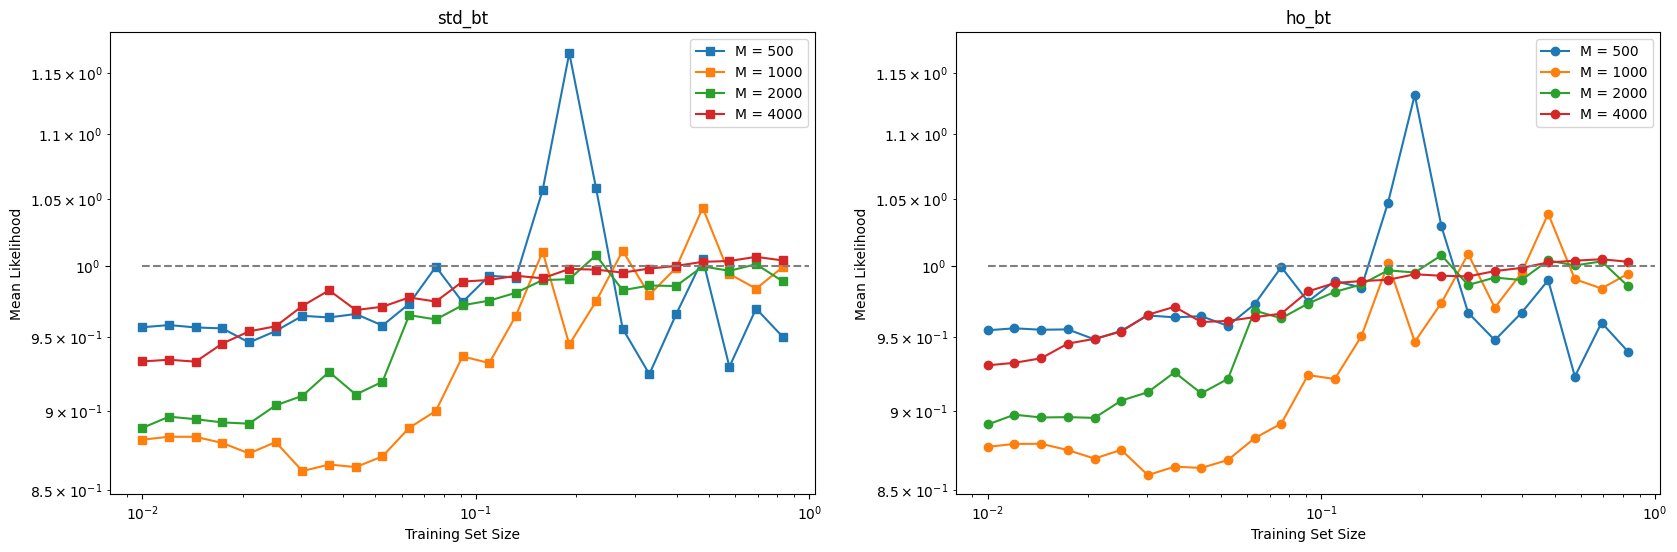

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

for M in M_values:
    axs[0].plot(train_sizes, results_std[M], label=f'M = {M}', marker='s')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_title('std_bt')
axs[0].hlines(1, 0.01, 1.0, colors='gray', linestyles='dashed')
axs[0].set_xlabel('Training Set Size')
axs[0].set_ylabel('Mean Likelihood')
axs[0].legend()


# Plot the results for hypergraph
for M in M_values:
    axs[1].plot(train_sizes, results_ho[M], label=f'M = {M}', marker='o')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title('ho_bt')
axs[1].hlines(1, 0.01, 1.0, colors='gray', linestyles='dashed')
axs[1].set_xlabel('Training Set Size')
axs[1].set_ylabel('Mean Likelihood')
axs[1].legend()

y_min = min(axs[0].get_ylim()[0], axs[1].get_ylim()[0])
y_max = max(axs[0].get_ylim()[1], axs[1].get_ylim()[1])
axs[0].set_ylim(y_min, y_max)
axs[1].set_ylim(y_min, y_max)



plt.show()

## testing game size

In [43]:
N = 500
M_values = 1000 
K_values = [2, 4, 6, 8, 10]


train_sizes = np.logspace(-2, 0, endpoint=False, num=25)

results_std = {K1: [] for K1 in K_values}
results_ho = {K1: [] for K1 in K_values}

for K1 in K_values:
    K2 = K1 + 1
    results = evaluate_model_likelihood(N, M, K1, K2) 
    for train_size in train_sizes:
        std_bt_likelihood = np.mean([result["std_bt_likelihood"] for result in results if result["train_size"] == train_size])
        ho_bt_likelihood = np.mean([result["ho_bt_likelihood"] for result in results if result["train_size"] == train_size])
        results_std[K1].append(std_bt_likelihood)
        results_ho[K1].append(ho_bt_likelihood)


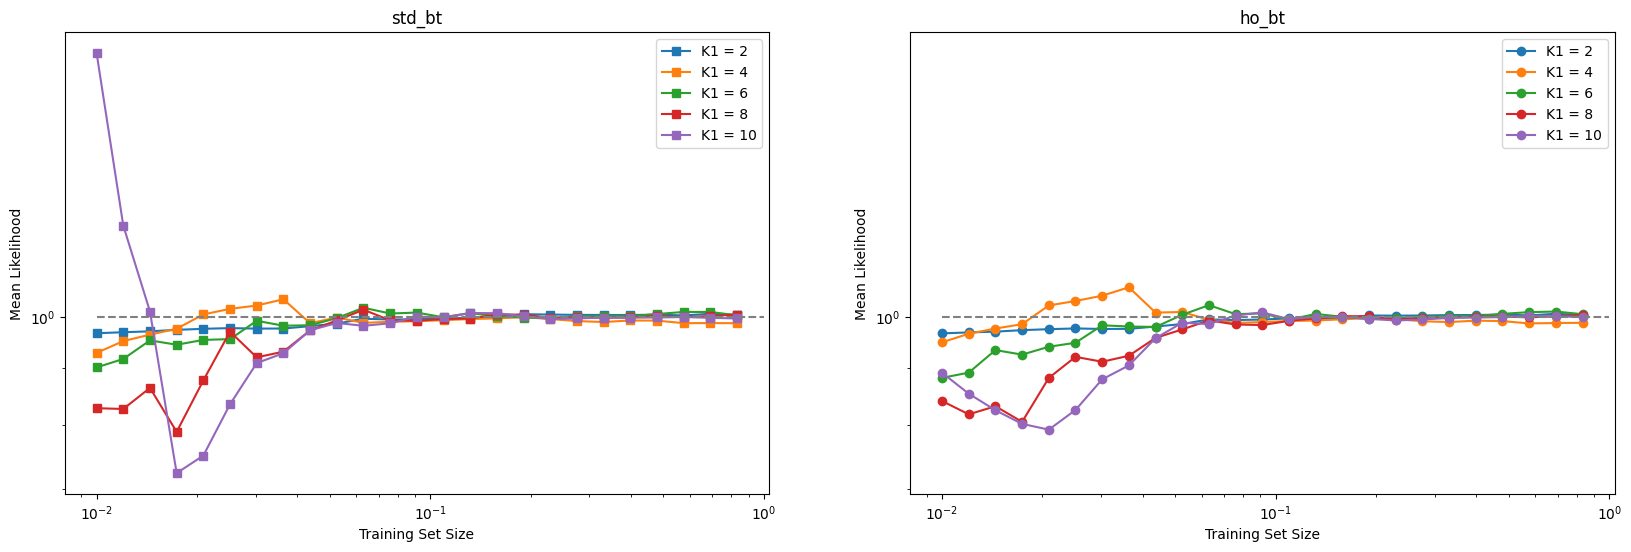

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

for K1 in K_values:
    axs[0].plot(train_sizes, results_std[K1], label=f'K1 = {K1}', marker='s')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_title('std_bt')
axs[0].hlines(1, 0.01, 1.0, colors='gray', linestyles='dashed')
axs[0].set_xlabel('Training Set Size')
axs[0].set_ylabel('Mean Likelihood')
axs[0].legend()


# Plot the results for hypergraph
for K1 in K_values:
    axs[1].plot(train_sizes, results_ho[K1], label=f'K1 = {K1}', marker='o')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title('ho_bt')
axs[1].hlines(1, 0.01, 1.0, colors='gray', linestyles='dashed')
axs[1].set_xlabel('Training Set Size')
axs[1].set_ylabel('Mean Likelihood')
axs[1].legend()

y_min = min(axs[0].get_ylim()[0], axs[1].get_ylim()[0])
y_max = max(axs[0].get_ylim()[1], axs[1].get_ylim()[1])
axs[0].set_ylim(y_min, y_max)
axs[1].set_ylim(y_min, y_max)

plt.show()

## testing K gap size 

In [45]:
N = 500
M = 1000
K1 = 2
K2_values = [2, 4, 6, 8, 10] 


train_sizes = np.logspace(-2, 0, endpoint=False, num=25)

results_std = {K2: [] for K2 in K2_values}
results_ho = {K2: [] for K2 in K2_values}

for K2 in K2_values:
    results = evaluate_model_likelihood(N, M, K1, K2) 
    for train_size in train_sizes:
        std_bt_likelihood = np.mean([result["std_bt_likelihood"] for result in results if result["train_size"] == train_size])
        ho_bt_likelihood = np.mean([result["ho_bt_likelihood"] for result in results if result["train_size"] == train_size])
        results_std[K2].append(std_bt_likelihood)
        results_ho[K2].append(ho_bt_likelihood)

/tmp/ipykernel_195177/4136818596.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()
/tmp/ipykernel_195177/4136818596.py:25: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  y_min = min(axs[0].get_ylim()[0], axs[1].get_ylim()[0])


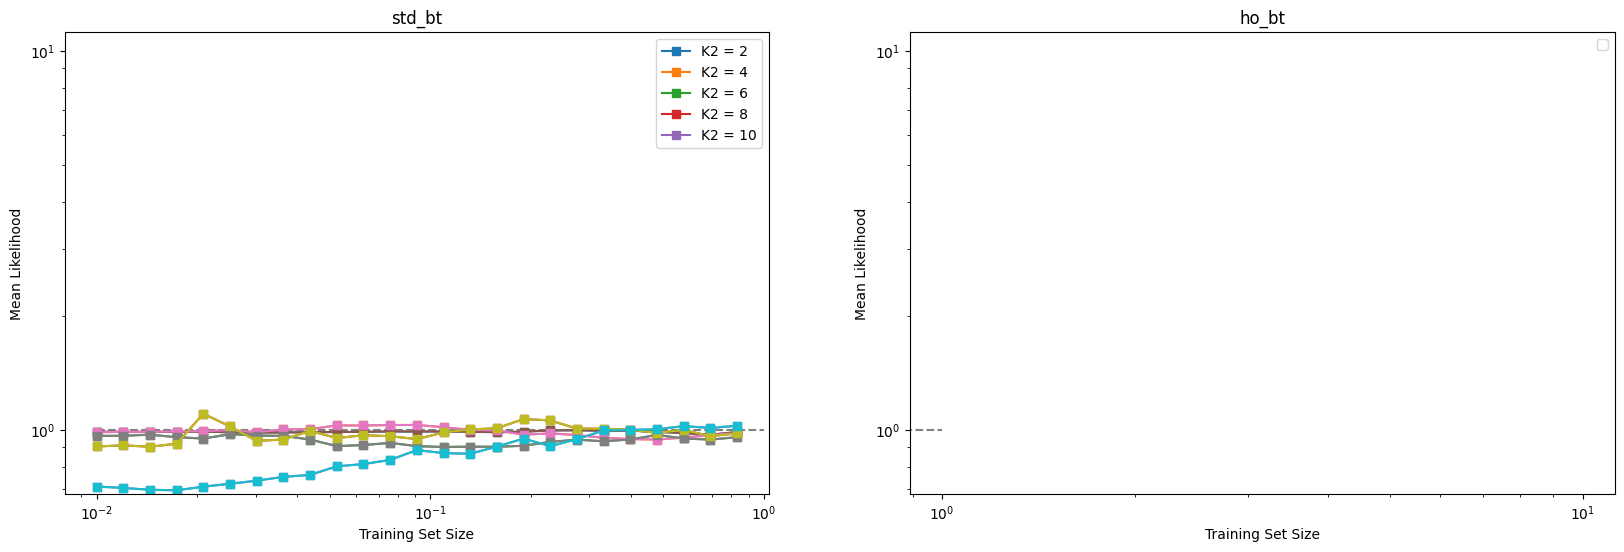

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

for K2 in K2_values:
    axs[0].plot(train_sizes, results_std[K2], label=f'K2 = {K2}', marker='s')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_title('std_bt')
axs[0].hlines(1, 0.01, 1.0, colors='gray', linestyles='dashed')
axs[0].set_xlabel('Training Set Size')
axs[0].set_ylabel('Mean Likelihood')
axs[0].legend()


# Plot the results for hypergraph
for K2 in K2_values:
    axs[0].plot(train_sizes, results_std[K2], label=f'K2 = {K2}', marker='s')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title('ho_bt')
axs[1].hlines(1, 0.01, 1.0, colors='gray', linestyles='dashed')
axs[1].set_xlabel('Training Set Size')
axs[1].set_ylabel('Mean Likelihood')
axs[1].legend()

y_min = min(axs[0].get_ylim()[0], axs[1].get_ylim()[0])
y_max = max(axs[0].get_ylim()[1], axs[1].get_ylim()[1])
axs[0].set_ylim(y_min, y_max)
axs[1].set_ylim(y_min, y_max)

plt.show()